In [1]:
# import libriaries
import pandas as pd # Pandas used for data manipulation
import numpy as np  # Numpy used for numarical data
import matplotlib.pyplot as plt # matplotlib used for data visulization
import seaborn as sns

from sklearn.imputer import KNNImputer,SimpleImputer # Used for missing values

from sklearn.model_selection import train_test_split # this sklearn library used for data split into testing and traning
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler # OneHot encoder are used for  enode catagorical data 

from sklearn.compose import make_column_transformer # That is used for transform our data into pipeline
from sklearn.pipeline import make_pipeline


from sklearn.linear_model  import LinearRegression,Lasso,Ridge # Regreesion models
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score  # these metrics are used for evalute model  and check lose
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Data load


In [2]:
df=pd.read_csv("medical_insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data preprocessing

In [4]:
df.shape

(2772, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [8]:
df.duplicated().sum()

1435

In [9]:
2762-1435# so we cats perform remover method on that

1327

# EDA

In [11]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# check data distribution using histograme plot

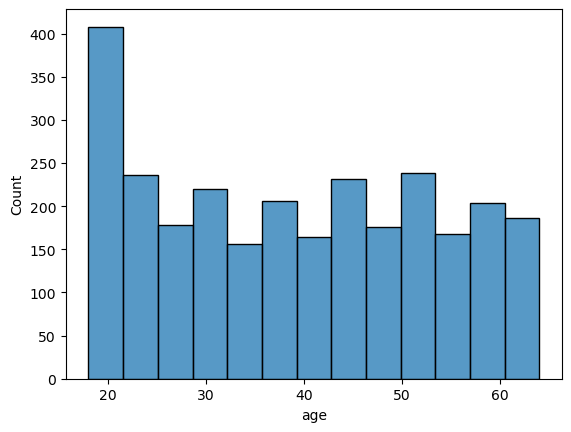

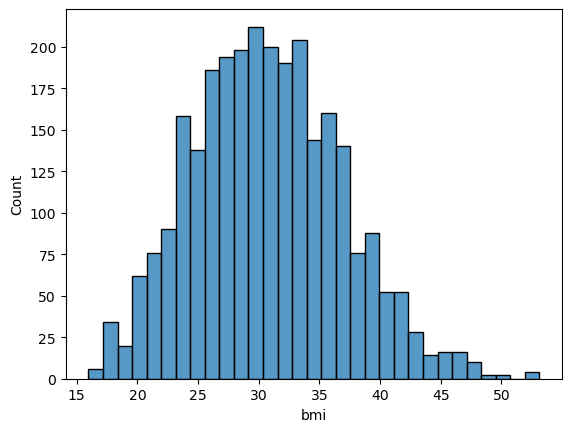

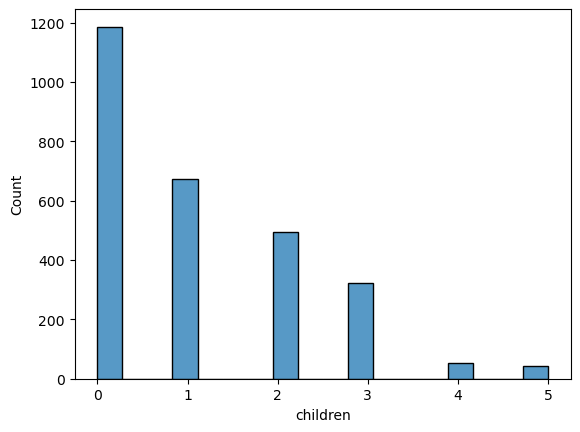

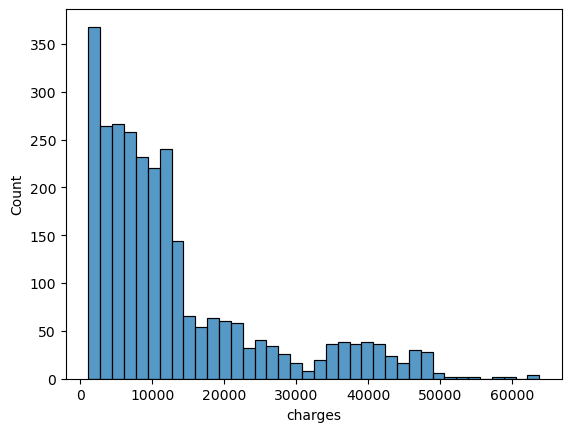

In [13]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()
    

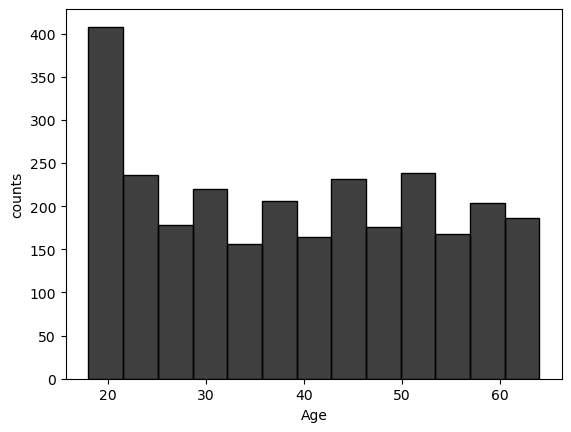

In [14]:
sns.histplot(df['age'],color='black')
plt.xlabel("Age")
plt.ylabel('counts')
plt.show()

#  check outliers using boxplot

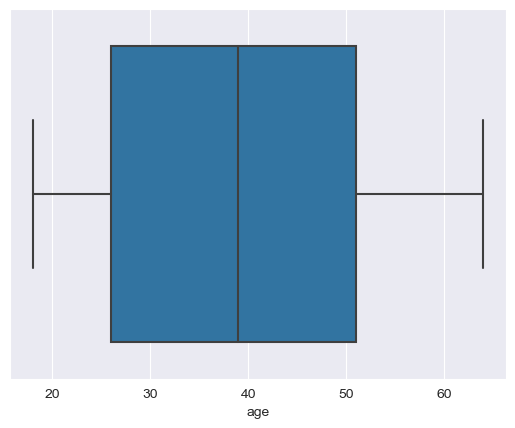

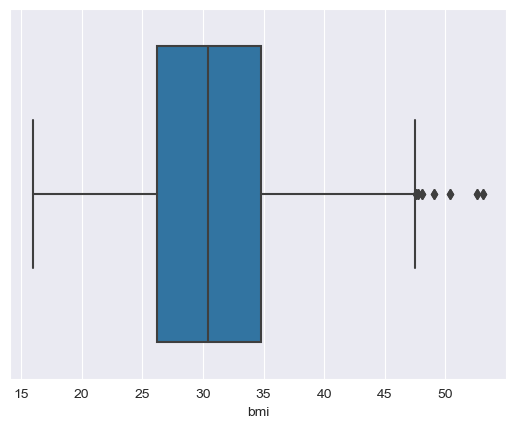

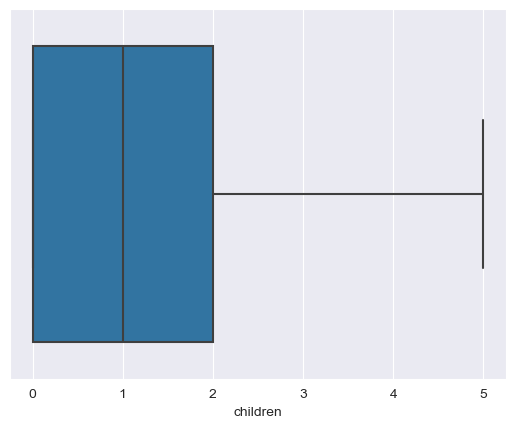

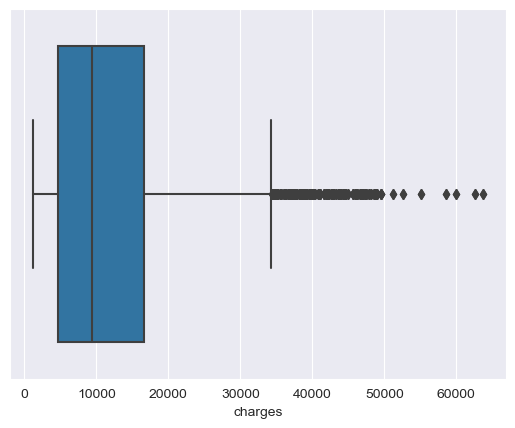

In [15]:
sns.set_style("darkgrid")
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

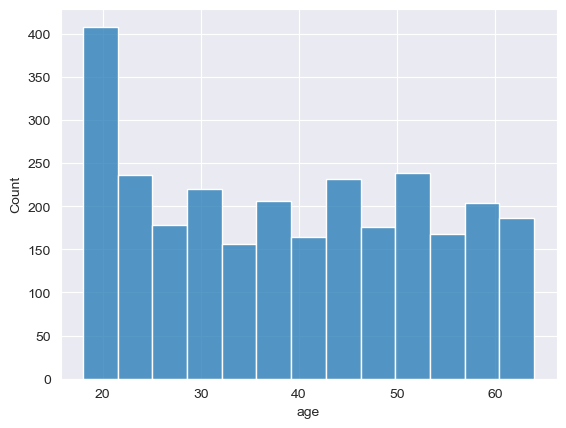

In [16]:
sns.set_style("darkgrid")
sns.histplot(df['age'])
plt.show()

<Axes: >

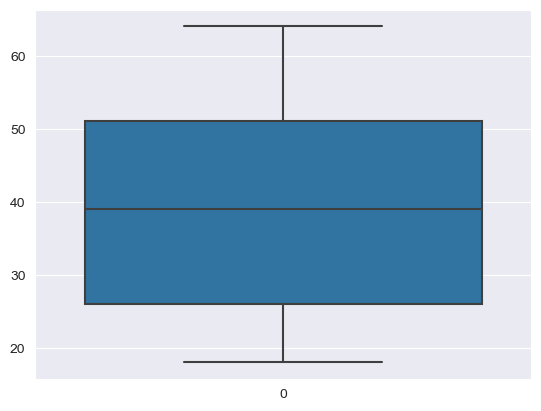

In [17]:
sns.set_style("darkgrid")
sns.boxplot(df['age'])

# data distribution of catagorical data

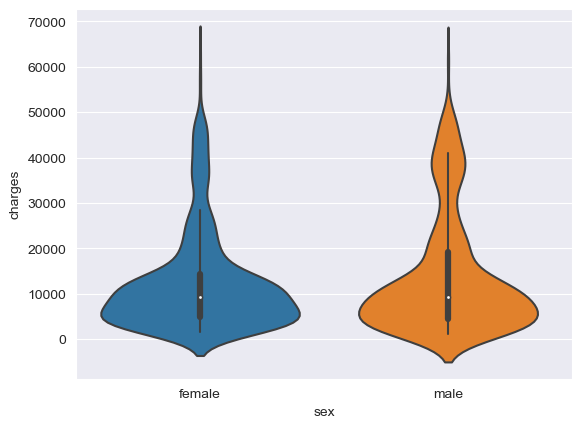

In [18]:
sns.set_style('darkgrid')
sns.violinplot(x='sex',y='charges',data=df)
plt.show()

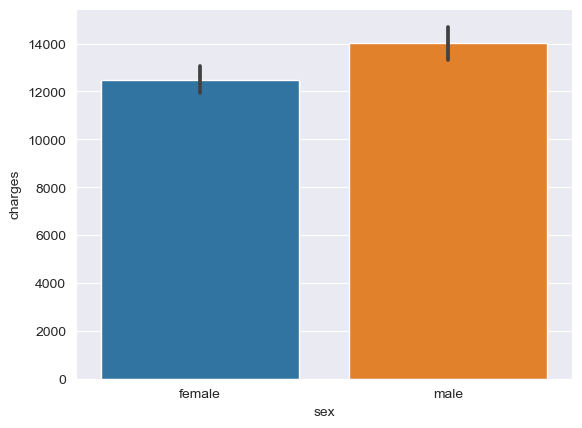

In [19]:
sns.barplot(x='sex',y='charges',data=df)
plt.show()

<Axes: ylabel='count'>

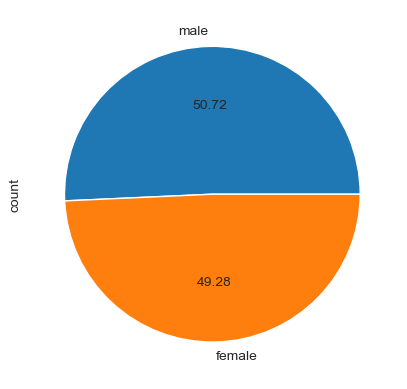

In [20]:
df['sex'].value_counts().plot(kind='pie',autopct='%.2f')

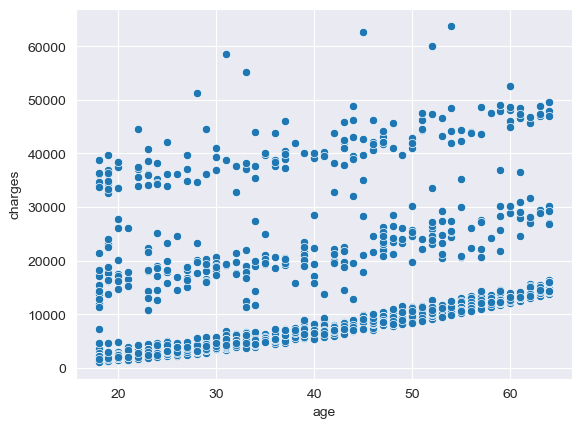

In [21]:
sns.scatterplot(x='age',y='charges',data=df)
plt.show()

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


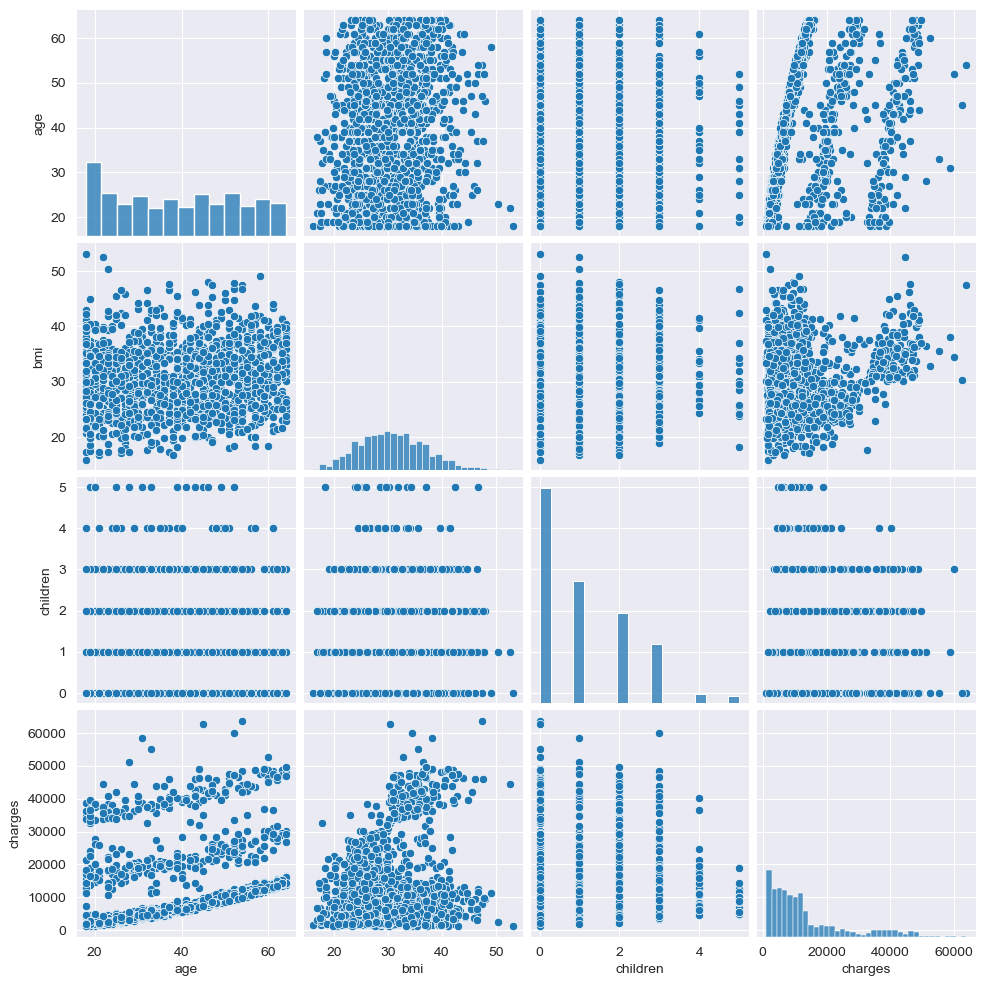

In [22]:
sns.pairplot(df)

# check co relation of numarical data using Heatmap

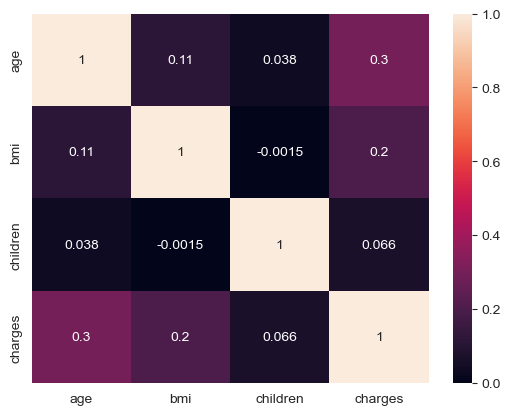

In [23]:
cor=df.select_dtypes(include='number').corr()
sns.heatmap(cor,annot=True)
plt.show()

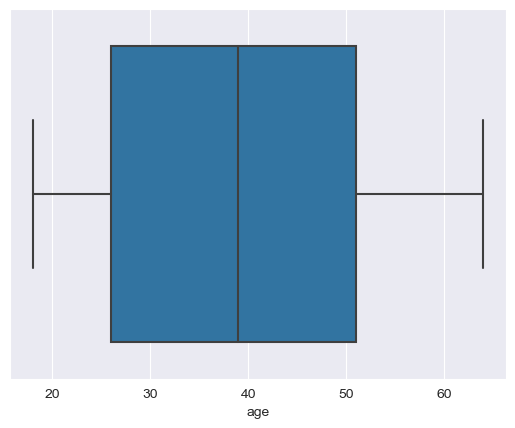

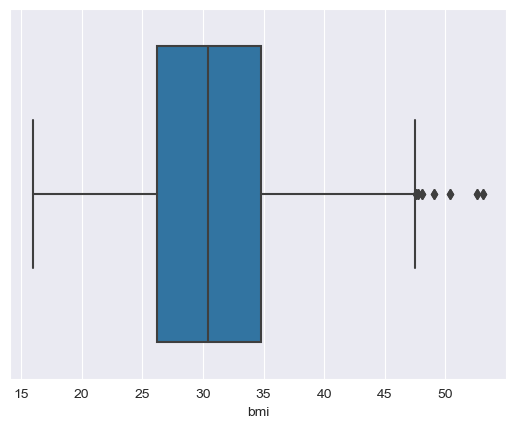

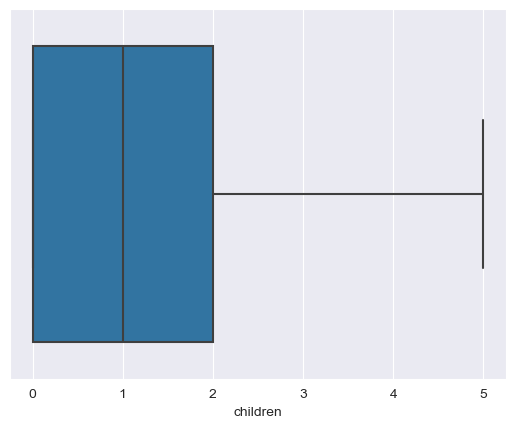

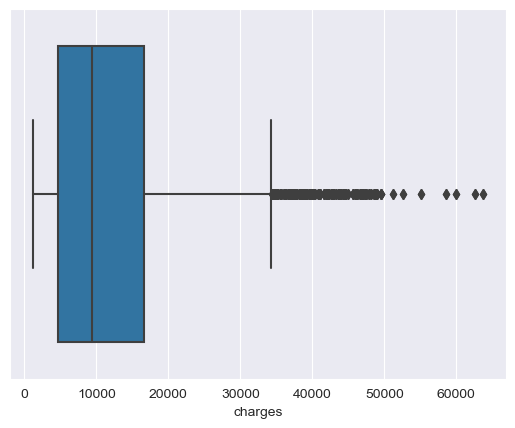

In [24]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

C:\Users\T L S\AppData\Local\Temp\ipykernel_11724\2859878543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


<Axes: xlabel='bmi', ylabel='Density'>

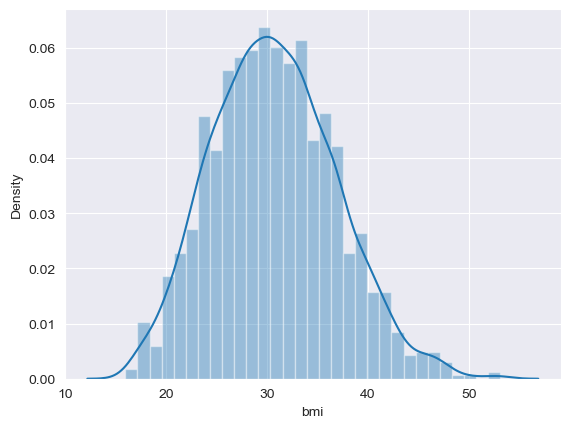

In [27]:
sns.distplot(df["bmi"])

In [28]:
upper_limit=df['bmi'].mean()+3*df['bmi'].std()
lower_limit=df["bmi"].mean()-3*df['bmi'].std()

In [29]:
upper_limit,lower_limit

(49.089695291244865, 12.313003121453558)

In [30]:
df.loc[(df['bmi']>upper_limit)|(df['bmi']<lower_limit)]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627
2233,23,male,50.38,1,no,southeast,2438.0552
2433,22,male,52.58,1,yes,southeast,44501.3982
2703,18,male,53.13,0,no,southeast,1163.4627


In [31]:
df2=df.loc

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df2=df.loc[(df['bmi']<upper_limit)&(df['bmi']>lower_limit)]
print('old_val',len(df))
print('new_val',len(df2))
print('outliers',len(df)-len(df2))

old_val 2772
new_val 2766
outliers 6


<Axes: >

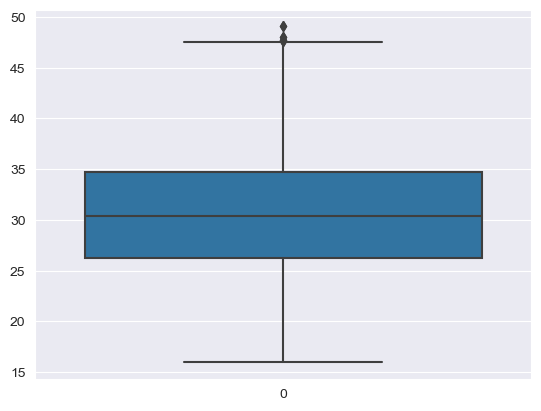

In [34]:
sns.boxplot(df2['bmi'])

In [35]:
df2=df

In [36]:
df2.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# lets treat the outliers with (removing & capping)

<Axes: >

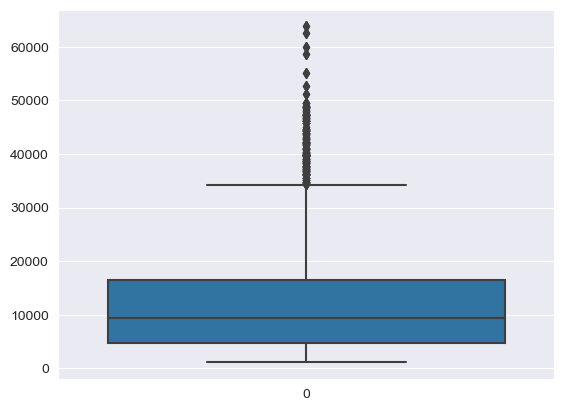

In [37]:
sns.boxplot(df2['charges'])

In [38]:
q1=df2['charges'].quantile(0.25)
q3=df2['charges'].quantile(0.75)
iqr=q3-q1

In [39]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [40]:
upper_limit,lower_limit

(34412.75325000001, -13147.176750000006)

In [41]:
df2.loc[(df['charges']>upper_limit)|(df2['charges']<lower_limit)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760
...,...,...,...,...,...,...,...
2735,52,male,41.80,2,yes,southeast,47269.8540
2736,64,male,36.96,2,yes,southeast,49577.6624
2744,32,male,33.63,1,yes,northeast,37607.5277
2764,22,female,31.02,3,yes,southeast,35595.5898


In [42]:
df2.loc[df['charges']>upper_limit,'charges']=upper_limit
df2.loc[df2['charges']<lower_limit,'charges']=lower_limit

<Axes: >

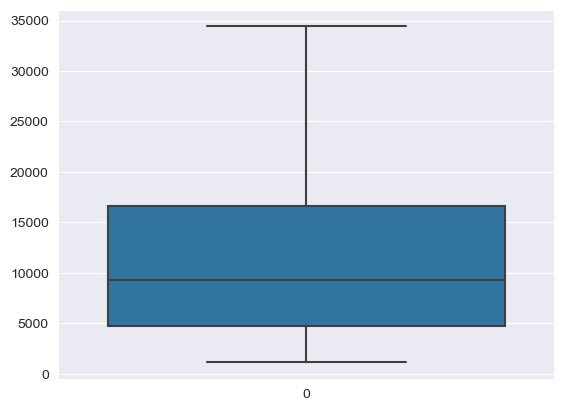

In [43]:
sns.boxplot(df2['charges'])

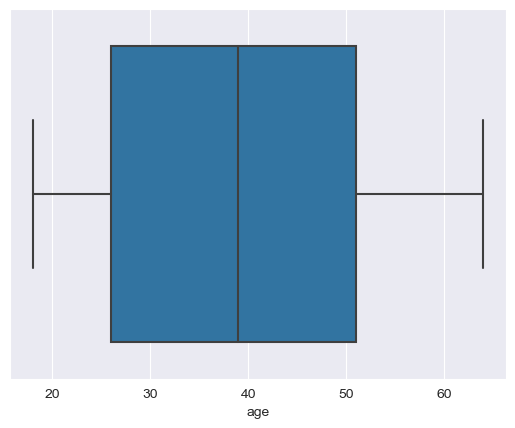

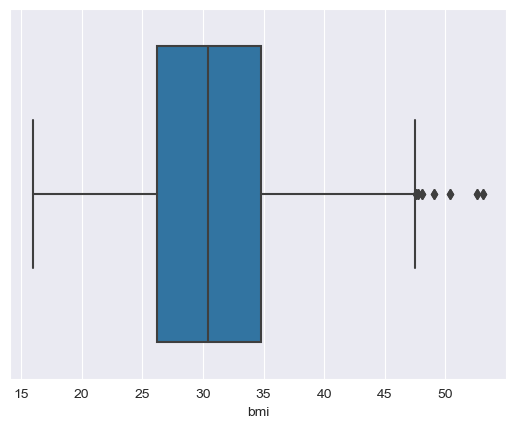

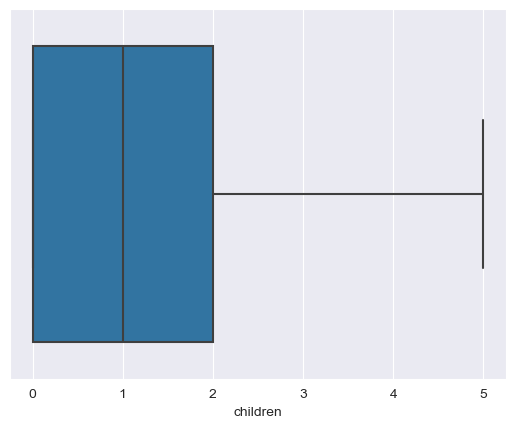

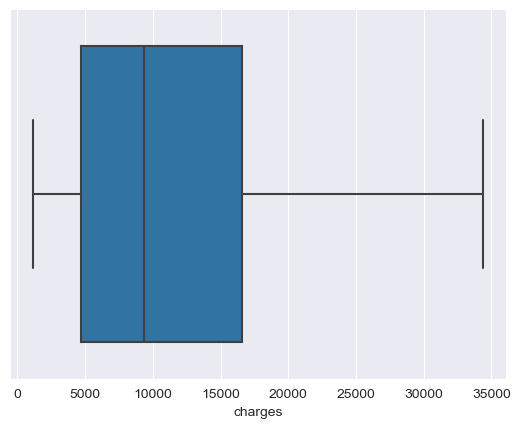

In [44]:
for i in df2.select_dtypes(include='number').columns:
    sns.boxplot(data=df2,x=i)
    plt.show()
                

In [45]:
q3=df2['bmi'].quantile(0.25)
q1=df2["bmi"].quantile(0.75)
iqr=q3-q1

In [46]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [47]:
upper_limit,lower_limit

(13.394999999999992, 47.59500000000001)

In [48]:
df2.loc[(df2['bmi']>upper_limit)|(df2['bmi']<lower_limit)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [49]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#  Data split


In [51]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [52]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast
2768,21,female,34.600,0,no,southwest
2769,19,male,26.030,1,yes,northwest
2770,23,male,18.715,0,no,northwest


In [53]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
X_train

,age,sex,bmi,children,smoker,region
2066,21,female,17.400,1,no,southwest
1240,52,male,41.800,2,yes,southeast
330,61,female,36.385,1,yes,northeast
2771,54,male,31.600,0,no,southwest
1238,37,male,22.705,3,no,northeast
...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast
835,42,male,35.970,2,no,southeast
1653,59,female,32.395,3,no,northeast
2607,40,male,24.970,2,no,southeast


In [56]:
y_train

2066     2585.26900
1240    34412.75325
330     34412.75325
2771     9850.43200
1238     6985.50695
           ...     
763      3070.80870
835      7160.33030
1653    14590.63205
2607     6593.50830
2732    12224.35085
Name: charges, Length: 2217, dtype: float64

# lets make a pipeline for our catagricol features and scaler,linear model

In [57]:
#lets make pipelinig
ohe=make_column_transformer((OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5]),remainder='passthrough')

In [58]:
scaler=MinMaxScaler()

In [59]:
lr=LinearRegression()

In [60]:
#make PIpeling
pip=make_pipeline(ohe,scaler,lr)

# lets train our model

In [61]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

# model evaluation

In [62]:
y_pred=pip.predict(X_test)

In [64]:
validation=cross_val_score(pip,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse`

In [65]:
np.mean(validation)

-26219466.086597964

# check how well our model using diff lose functions

In [67]:
mse=mean_squared_error(y_test,y_pred)

In [68]:
print(mse)

27514874.62399767


In [69]:
mae=mean_absolute_error(y_test,y_pred)

In [70]:
print(mae)

3383.6697126108115


In [71]:
score=r2_score(y_test,y_pred)

# Accuracy score

In [72]:
print(score)

0.7380040117786922


In [73]:
y_pred

array([ 2304.,  1280.,  7232.,  3968., 12608.,  3968.,  6400.,  3904.,
        8064., 24256., 24512., 10944.,  3456.,  9408.,  6464., 12864.,
       10624., 11904., 10880., 25408., 11520.,  4736., 34176.,  2240.,
       11392., 26880., 12288., 14272., 27904., 10368., 26496.,  6656.,
        9344.,  4864.,  3072., 32384., 10112.,  9152., 12864.,  8064.,
       25344.,  1728.,  6400., 10432.,  8832., 31232., 23744., 23168.,
        8832.,  3520., 31808.,  2176.,  4736.,  3136.,  7296.,  6848.,
       23488., 34176.,  4352., 15360., 12928., 28288.,  5184., 13056.,
       10240., 10880.,  9984., 25536.,  6784.,  9408.,  8192.,  3264.,
       32256.,  6912.,  4672.,  6208.,  7680., 10304.,  1728., 29632.,
        6976., 13056., 11200.,  6208., 10496.,  8704.,  5504.,  9920.,
       12224., 11264.,  2240., 33792., 23616.,  8512.,  1920.,  2880.,
        8512., 28608., 12032.,  2944.,  4928.,  3264., 24576., 11520.,
        8512., 11072.,  9920., 14976., 11328.,  9024.,  6976.,  8000.,
      

# model evaluation using graph

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


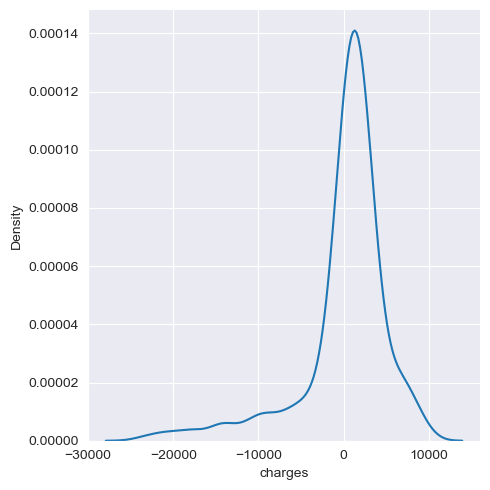

In [74]:
sns.displot(y_pred-y_test,kind='kde')

# other regression model

In [75]:
from sklearn.linear_model import Lasso,Ridge


In [76]:
lasso=Lasso()

In [77]:
pip_l=make_pipeline(ohe,scaler,lasso)

In [78]:
pip_l.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('minmaxscaler', MinMaxScaler()), ('lasso', Lasso())])

In [79]:
y_predl=pip_l.predict(X_test)

In [80]:
score_l=r2_score(y_test,y_predl)

In [81]:
print(score_l)

0.7399283655627565


In [82]:
ridg=Ridge()

In [83]:
pip_r=make_pipeline(ohe,scaler,ridg)

In [84]:
pip_r.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('minmaxscaler', MinMaxScaler()), ('ridge', Ridge())])

In [85]:
y_predr=pip_r.predict(X_test)

In [86]:
scorer=r2_score(y_test,y_predr)

In [87]:
print(scorer)

0.7398517210340634


In [102]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=100)

In [104]:
pip_grad=make_pipeline(ohe,scaler,gbr)

In [105]:
pip_grad.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('minmaxscaler', MinMaxScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=1))])

In [106]:
y_pred_grad=pip_grad.predict(X_test)

In [107]:
y_pred_grad

array([ 2373.02730388, 22051.99675759,  5722.90679011,  1835.40835108,
       13802.33201126,  1863.39933929,  7694.38198783,  1598.94021456,
        6255.83112209, 31719.13259769, 33854.8896072 ,  8554.57772208,
        2931.92090206,  5725.73183606,  8316.49663219, 16425.60093441,
       17683.14024786,  7371.4776477 ,  8190.60547973, 35525.95820488,
       13114.93395093,  1311.43789279, 35343.34785085,  1389.3678453 ,
       10042.39694286, 21410.99622899, 10639.8813316 , 18126.40733351,
       32451.21387134, 27177.192365  , 17209.93358903,  6940.51120652,
       22014.62678572,   854.07278363,  3850.54271401, 43914.24154363,
       12142.67032928, 15234.80781251, 16425.60093441,  5494.36471265,
       15568.82823983,  2095.90771195,  1790.16021147, 12739.14903044,
        5216.74796818, 32698.75657971, 17253.44345079, 16998.24718402,
       10372.05841815,   254.69304491, 33337.83485245,  2595.42193473,
        2769.61716373,  3065.68058189,  3476.06734769,  3248.39418074,
      

In [108]:
mse_grad=mean_squared_error(y_test,y_pred_grad)

In [109]:
print(mse_grad)

12802693.249951996


In [110]:
score=r2_score(y_test,y_pred_grad)

In [111]:
print(score)

0.8780930563648668


In [ ]:
# our model is perfectively work and our also train on regulization method like Ridge and Lasso
# in which Linear regression model score is 70% plus not bad 
# and lastly we train Gdboost whic bettre achive score 87% that realy amaizing 
# and u can try it for bettre evallution
